In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../datasets/Lung Cancer Dataset.csv')
df.head(15)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
5,37,1,1,1,1,1,1,57.684285,0,1,1,1,94.057151,1,0,0,0,YES
6,50,0,1,1,1,0,1,52.647022,1,1,1,0,96.773598,0,0,0,1,NO
7,68,0,1,1,1,0,1,53.306451,0,0,0,1,95.019018,0,0,0,0,NO
8,48,0,1,1,0,1,1,64.272789,1,1,0,1,98.539379,1,0,0,0,YES
9,52,0,0,0,1,1,1,58.319319,0,1,0,1,96.055097,0,0,0,0,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [6]:
df.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

In [9]:
df['PULMONARY_DISEASE'].value_counts()
df['PULMONARY_DISEASE'].value_counts(normalize=True) * 100

PULMONARY_DISEASE
NO     59.26
YES    40.74
Name: proportion, dtype: float64

In [10]:
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map(
    {
        'YES':1,
        'NO':0
    })

In [11]:
X = df.drop(columns=['PULMONARY_DISEASE'])
y = df['PULMONARY_DISEASE']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42
)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = BaggingClassifier(
    estimator = DecisionTreeClassifier(class_weight='balanced'),
    # estimator = DecisionTreeClassifier(),
    # n_estimators = 100, 
    # n_estimators = 200, 
    n_estimators = 300,
    max_samples = 0.8,
    bootstrap = True,
    n_jobs = -1,
    random_state = 42
)

In [36]:
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [37]:
AccuracyTrain = accuracy_score(y_train, pred_train)
AccuracyTest = accuracy_score(y_test, pred_test)
print(f"Training Accuracy: {AccuracyTrain:.3f}")
print(f"Test Accuracy: {AccuracyTest:.3f}")

ClassReport = classification_report(y_test, pred_test)
print("Classification Report:\n", ClassReport)

Training Accuracy: 1.000
Test Accuracy: 0.916
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       571
           1       0.91      0.90      0.90       429

    accuracy                           0.92      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 532                  39
Actual Positive                  45                 384


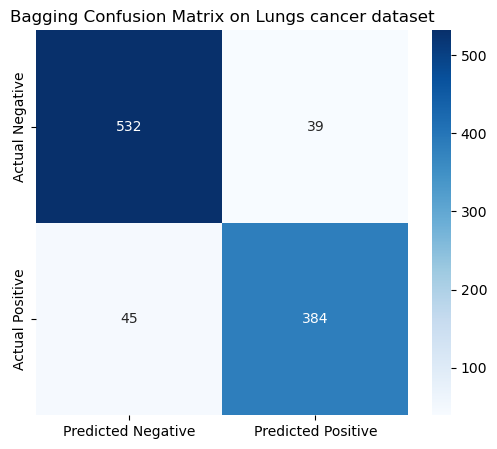

In [38]:
ConfMatrix = confusion_matrix(y_test, pred_test)
ConfMatrixDF = pd.DataFrame(
    ConfMatrix,
    index=["Actual Negative", "Actual Positive"],
    columns=["Predicted Negative", "Predicted Positive"]
)
print("Confusion Matrix:\n", ConfMatrixDF)


plt.figure(figsize=(6,5))
sns.heatmap(ConfMatrixDF, annot = True, fmt='d', cmap='Blues')
plt.title("Bagging Confusion Matrix on Lungs cancer dataset")
plt.show()